<a href="https://colab.research.google.com/github/loc1263/COVID-Chile/blob/master/Covid_ALL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

File='/content/drive/My Drive/Dataset/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

data = pd.read_csv(File, sep=',')
#data.head(50)

In [0]:
def create_df(pais):
      import numpy as np 

      array = [pais]
      data.loc[data['Country/Region'].isin(array)]
      df=data.loc[data['Country/Region'].isin(array)]
      df=df.transpose() 
      df=df.drop(['Lat', 'Long','Province/State'])
      df.columns = df.iloc[0]
      df = df[1:]

      df['Real_Row'] = np.arange(len(df))+1
      df.reset_index(level=0, inplace=True)
      df = df.rename_axis(index=None, columns=None)
      df = df.rename(columns={df.columns[0]: 'Fecha' , df.columns[1]: 'Casos'})
      df=df[['Real_Row', 'Fecha', 'Casos']]

      df_Filter = df[(df['Casos'] > 0)]
      df_Filter.reset_index(drop=True,level=0, inplace=True)
      df_Filter.insert(0, 'Dia', range(1, 1 + len(df_Filter)))
      df=df_Filter
      
      df=df.head(40) # Numero de dias que se toman

      return df

def create_dfCasos(pais):    
    # Dataframe solo con los datos a partir del primer caso detectado
    
    df=create_df(pais)
    dfNew= df[['Fecha','Casos']]
    dfNew= dfNew[(dfNew['Casos'] > 0)] # Se toma desde el primer caso contabilizado
    dfNew.reset_index(drop=True,level=0, inplace=True)
    dfNew.insert(0, 'Dia', range(1, 1 + len(dfNew)))

    return dfNew
  
dfCL=create_dfCasos('Chile')  
dfIT=create_dfCasos('Italy')  
dfAR=create_dfCasos('Argentina')  
dfJP=create_dfCasos('Japan') 
dfSP=create_dfCasos('Spain') 
dfCO=create_dfCasos('Colombia') 


In [0]:
#Deja solo los casos por paises

df_paises = pd.concat([dfCL,dfIT,dfAR,dfJP,dfSP,dfCO,], axis=1)
columnas = ['DiaCL', 'FechaCL', 'CasosCL','DiaIT', 'FechaIT', 'CasosIT','DiaAR', 'FechaAR', 'CasosAR','DiaJP', 'FechaJP', 'CasosJP','DiaSP', 'FechaSP', 'CasosSP','DiaCO', 'FechaCO', 'CasosCO']

df_paises.columns = columnas
df_paises=df_paises[['CasosCL','CasosIT','CasosAR','CasosJP','CasosSP','CasosCO']]

#reset al indice
df_paises.reset_index(drop=True,level=0, inplace=True)
df_paises.insert(0, 'Dia', range(1, 1 + len(df_paises)))

#df_paises

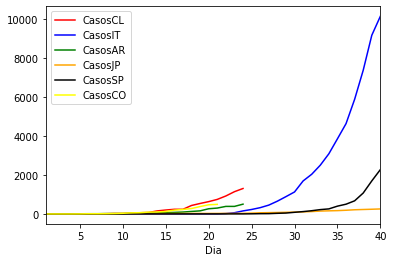

In [109]:
import matplotlib.pyplot as plt

ax = plt.gca()

df_paises.plot(kind='line',x='Dia',y='CasosCL', color='red'    , ax=ax)
df_paises.plot(kind='line',x='Dia',y='CasosIT', color='blue'   , ax=ax)
df_paises.plot(kind='line',x='Dia',y='CasosAR', color='green'  , ax=ax)
df_paises.plot(kind='line',x='Dia',y='CasosJP', color='orange' , ax=ax)
df_paises.plot(kind='line',x='Dia',y='CasosSP', color='black'  , ax=ax)
df_paises.plot(kind='line',x='Dia',y='CasosCO', color='yellow' , ax=ax)

plt.show()

